In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from osgeo import gdal
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib import cm
import matplotlib

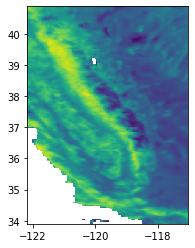

<AxesSubplot:>

In [2]:
dataset = rasterio.open('\\users\\marianne\\documents\\data\\avhrr_ndvi_monthly_new\\2006-06.tif')
show(dataset)  # factor 3 to increase brightness


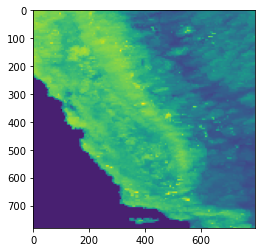

<AxesSubplot:>

In [3]:
yr = 2000
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
show(dataset)

In [7]:
os.chdir('/users/marianne/documents/data')
# sn_watersheds= gpd.read_file('data/sn_watersheds.shp')
mtbs= gpd.read_file('mtbs_perimeter_data/mtbs_perims_DD.shp')

<AxesSubplot:title={'center':'max NDVI 2013'}>

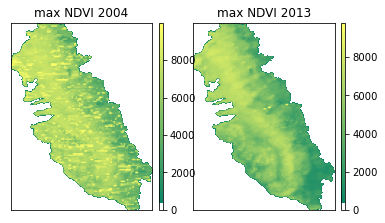

In [9]:

summer = cm.get_cmap('summer', 256)
newcolors = summer(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
f,ax=plt.subplots(1,2)
yr = 2004
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
ep.plot_bands(avhrr_clip,
            ax=ax[0],
            title = 'max NDVI ' + str(yr),
            cmap = newcmp)
yr=2013
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)

ep.plot_bands(avhrr_clip,
            ax=ax[1],
            title = 'max NDVI ' + str(yr),
            cmap = newcmp)

In [121]:
max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))
    # print(np.nanmean(avhrr_clip.values))

AttributeError: 'DataArray' object has no attribute 'to_numpy'